Vectoriser



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/emails.csv')

In [ ]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
df.shape

(5728, 2)

In [ ]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

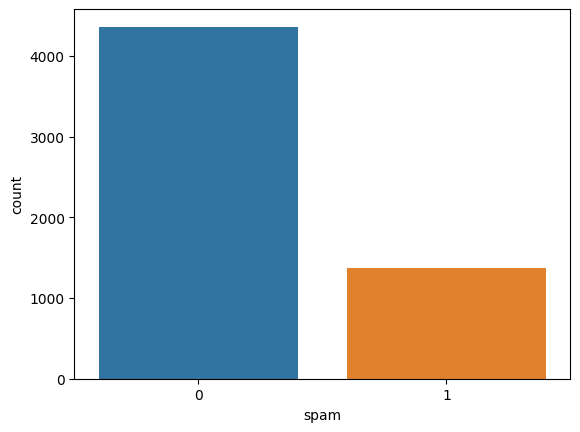

In [ ]:
seaborn.countplot(x='spam',data=df)

In [ ]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
X= df.text.values
y= df.spam.values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_vectorized=cv.fit_transform(X)
X_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_vectorized,y,test_size=.25,random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred=mnb.predict(X_test)

In [ ]:
print("Accuracy score: ", accuracy_score(y_test,pred))

Accuracy score:  0.9916201117318436


In [ ]:
confusion_matrix(y_test,pred)

array([[1076,    7],
       [   5,  344]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1083
           1       0.98      0.99      0.98       349

    accuracy                           0.99      1432
   macro avg       0.99      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432



Text(0.5, 427.9555555555555, 'Predicted label')

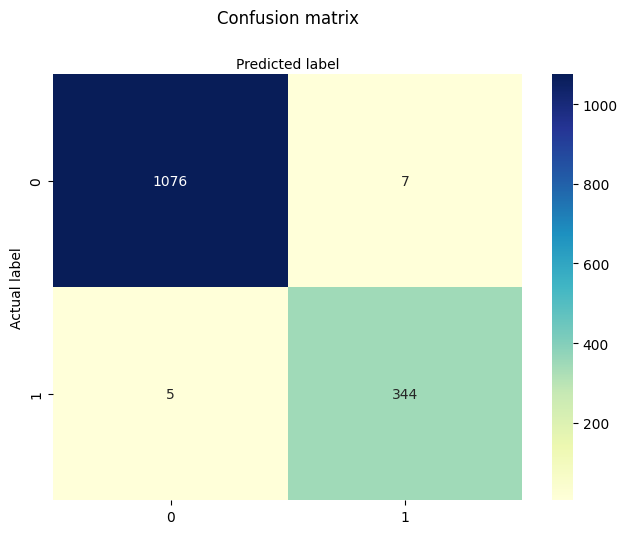

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y_test,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

cross validation


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/emails.csv')
X = df.iloc[:,1:3]
y = df.iloc[:,-1]
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

print("Test data accuracy:",accuracy_score(y_test, y_pred))

Test data accuracy: 0.9902234636871509


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
# K-Fold
logr1=LogisticRegression()
score=cross_val_score(logr1,X,y,cv=5)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))

In [ ]:
#Stratified KFold is used for imbalanced data

logr2=LogisticRegression()
score=cross_val_score(logr2,X,y,cv= StratifiedKFold(5))

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation (Test data accuracy): 1.0
